In [1]:
  !pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data #using this directory  to scrap data from yahoo website 


In [3]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464117


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.551147
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.640778
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.465637
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,176.838242


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537304
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464117


In [6]:
df = df.drop(['Date' , 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


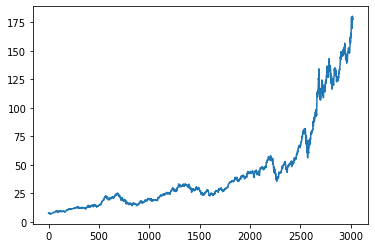

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()

In [9]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3016    153.3444
3017    153.6667
3018    153.9991
3019    154.3202
3020    154.6399
Name: Close, Length: 3021, dtype: float64

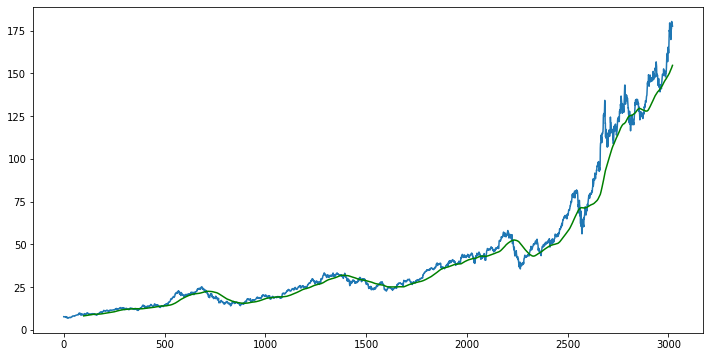

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'g')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3016    142.85570
3017    143.13220
3018    143.40125
3019    143.66845
3020    143.95365
Name: Close, Length: 3021, dtype: float64

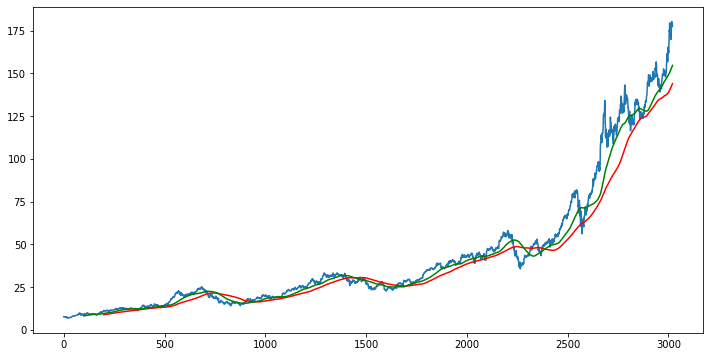

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma200, 'r')
plt.plot(ma100, 'g')

In [13]:
df.shape

(3021, 5)

In [14]:
# splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(907, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = Scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])




In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML MODEL

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))





In [23]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4fc88b5e10>>

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 [==============================] - 36s 456ms/step - loss: 0.0429
Epoch 2/50
63/63 [==============================] - 19s 305ms/step - loss: 0.0069
Epoch 3/50
63/63 [==============================] - 19s 308ms/step - loss: 0.0069
Epoch 4/50
63/63 [==============================] - 18s 293ms/step - loss: 0.0065
Epoch 5/50
63/63 [==============================] - 18s 291ms/step - loss: 0.0056
Epoch 6/50
63/63 [==============================] - 20s 321ms/step - loss: 0.0054
Epoch 7/50
63/63 [==============================] - 18s 291ms/step - loss: 0.0059
Epoch 8/50
63/63 [==============================] - 18s 290ms/step - loss: 0.0057
Epoch 9/50
63/63 [==============================] - 18s 292ms/step - loss: 0.0049
Epoch 10/50
63/63 [==============================] - 18s 291ms/step - loss: 0.0046
Epoch 11/50
63/63 [==============================] - 19s 309ms/step - loss: 0.0041
Epoch 12/50
63/63 [==============================] - 19s 308ms/step - loss: 0.0044
Epoch 13/50
6

In [25]:
model.save('keras+model.hs')

In [26]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = past_100_days.append(data_testing, ignore_index =True)

In [29]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [30]:
input_data = Scaler.fit_transform(final_df)

In [31]:
input_data

array([[0.0518709 ],
       [0.05325229],
       [0.05665394],
       ...,
       [0.99343845],
       [0.98528824],
       [0.98093696]])

In [32]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [33]:
x_test , y_test = np.array(x_test), np.array(y_test)


In [34]:
# making predictions

In [37]:
y_predicted = model.predict(x_test)

In [38]:
y_predicted.shape

(907, 1)

In [39]:
y_test

array([0.07892872, 0.07823804, 0.07715019, 0.08296929, 0.08571478,
       0.08827033, 0.08942723, 0.08852935, 0.08549029, 0.08467873,
       0.0864918 , 0.08376357, 0.08393625, 0.08055185, 0.08037919,
       0.07511267, 0.07651131, 0.07471553, 0.07378308, 0.06903458,
       0.07293697, 0.07247078, 0.07478459, 0.07411116, 0.07768548,
       0.07205635, 0.0746119 , 0.07904961, 0.08355637, 0.08315923,
       0.07889421, 0.08433339, 0.08485141, 0.08412619, 0.08505861,
       0.08324554, 0.08580112, 0.08504135, 0.0853349 , 0.08773505,
       0.0908777 , 0.0898244 , 0.08424705, 0.08239946, 0.0830556 ,
       0.10241223, 0.11258266, 0.11361871, 0.11548358, 0.11209918,
       0.11234092, 0.1151555 , 0.1128244 , 0.11513821, 0.11665774,
       0.11750385, 0.12282217, 0.13017802, 0.12651737, 0.12579212,
       0.1258094 , 0.12656917, 0.12772607, 0.13079965, 0.13383868,
       0.13950234, 0.14304214, 0.14753165, 0.14879215, 0.14621932,
       0.13970957, 0.13660145, 0.13147307, 0.14100462, 0.13620

In [40]:
y_predicted

array([[0.13090418],
       [0.1315358 ],
       [0.1320447 ],
       [0.13244155],
       [0.13275209],
       [0.13301156],
       [0.13325833],
       [0.13352656],
       [0.13383764],
       [0.13419339],
       [0.13458273],
       [0.1349935 ],
       [0.13540599],
       [0.1358003 ],
       [0.13615206],
       [0.13644013],
       [0.13663878],
       [0.13673197],
       [0.13671136],
       [0.13657582],
       [0.13632247],
       [0.13596365],
       [0.13551983],
       [0.13502078],
       [0.13449621],
       [0.13398162],
       [0.13349506],
       [0.13305116],
       [0.13267118],
       [0.13238285],
       [0.1322059 ],
       [0.13213843],
       [0.13217987],
       [0.13232666],
       [0.13256703],
       [0.13288605],
       [0.13326158],
       [0.13367543],
       [0.13410948],
       [0.13454723],
       [0.1349804 ],
       [0.13541159],
       [0.13584265],
       [0.13625985],
       [0.13664192],
       [0.13697103],
       [0.1372831 ],
       [0.137

In [45]:
Scaler.scale_

array([0.00690691])

In [46]:
scale_factor = 1/0.00690691  
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

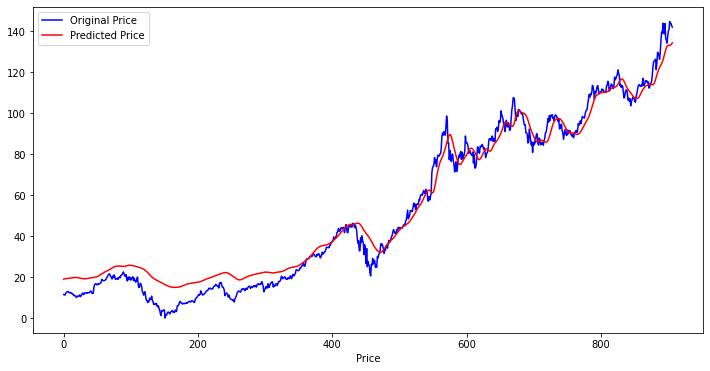

In [47]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.xlabel('Price')
plt.legend()
plt.show()